<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Regression/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression 

y = W.X+ b

W = Weights <br>
X = Features <br>
b = bais <br>

## Generate the data

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=20.0, bias=1.0, coef=True,random_state=42)

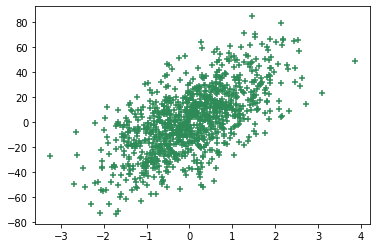

In [3]:
# plot the data
plt.scatter(X, y, marker='+', c='seagreen');

In [4]:
df = pd.DataFrame(data={'feature':X.reshape(-1), 'target':y, 'weight':coef, 'bias':1.0, 'y=Wx+b':(X.reshape(-1)*coef)+1.0 })
df.head()  

,feature,target,weight,bias,y=Wx+b
0,-1.758739,-35.084949,16.748258,1.0,-28.455823
1,1.031845,-9.272417,16.748258,1.0,18.281599
2,-0.487606,-26.694060,16.748258,1.0,-7.166555
3,0.186454,-10.103187,16.748258,1.0,4.122785
4,0.725767,15.055202,16.748258,1.0,13.155327


In [5]:
## split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1), y, test_size=0.2, random_state=42)

print('Shape of training feature',X_train.shape)
print('Shape of training target',y_train.shape)
print('Shape of testing feature',X_test.shape)
print('Shape of testing target',y_test.shape)

Shape of training feature (800,)
Shape of training target (800,)
Shape of testing feature (200,)
Shape of testing target (200,)


## Weigth matrix  and Bias

In [6]:
def get_weight_and_bias():
  Weights = np.random.rand()
  Bias = 0.01*np.random.rand()
  return Weights,Bias

In [7]:
Weights,Bias=get_weight_and_bias()

# output shape after linear operation y = Wx+b
(X_train*Weights+Bias).shape

(800,)

## Create a linear model
Linear Model from scratch using python

y = Wx+B


`W = weight`, `x = feature`, `B = bias`

In [8]:
def linear_regression(features, weights, bias):
  y_hat = (features*weights)+bias
  return y_hat

## Loss function
Mean squared error = mean of (y_true - y_preds)**2

In [9]:
def loss_fn(ground_truth, predictions):
  return np.mean(np.square((ground_truth-predictions)))
  # return (1/len(ground_truth))*np.sum((ground_truth - predictions)**2)

## Gradient Descent 
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

We use mean squared error as the Loss function <br>
1/N * (y_true - y_pred)**2

Where y_pred = Wx+b (linear regression)

**error = y_true - Wx+b**

derivative with respect to Weights <br>
 -2/N * (error) * x

derivative with respect to bias <br>
 -2/N * (error) * 1

We want to move in the negative direction of the gradient

### Updating weights and bias

W<sup>k+1</sup> = W<sup>k</sup> + (Learning_rate * -Gradient)

B<sup>k+1</sup> = B<sup>k</sup> + (Learning_rate * -Gradient)





In [10]:
def gradient_descent(features, ground_truth, predictions):
  # difference btw true-values and predicted-values is the error
  error = ground_truth-predictions
  # derivative of loss wrt weights
  dW = -2*np.mean((error*features))
  # derivative of loss wrt bias
  db = -2*np.mean(error)
  
  return dW,db
  

## Training a Linear model


In [11]:
def model_training(epochs,W,b,learning_rate=1e-3):

  for i in range(epochs):
    # get predictions
    y_hat = linear_regression(X_train, weights=W, bias=b)
    # compute loss
    loss = loss_fn(y_train, y_hat)

    # optimize the model parameters 
    dW, db = gradient_descent(X_train, y_train, y_hat)
    # update the weights
    W = W + (learning_rate*-dW)
    b = b + (learning_rate*-db)
    
    # print the loss

    print('epoch:',i,' loss:',loss)


In [12]:
# Training
w,b = get_weight_and_bias()
model_training(10,w,b)

epoch: 0  loss: 638.1495617866481
epoch: 1  loss: 637.1882645400142
epoch: 2  loss: 636.2305808885753
epoch: 3  loss: 635.2764972425156
epoch: 4  loss: 634.3260000631515
epoch: 5  loss: 633.3790758627382
epoch: 6  loss: 632.4357112042791
epoch: 7  loss: 631.4958927013337
epoch: 8  loss: 630.559607017828
epoch: 9  loss: 629.6268408678645


## Complete Linear model from scratch

In [13]:
class Linear_reg:
  def __init__(self, learning_rate=1e-3, weight= np.random.rand(), bias=0.001*np.random.rand()):
    self.learning_rate = learning_rate
    self.weight = weight 
    self.bias = bias
  
  def linear_regression(self, features):
    return (features*self.weight)+self.bias

  def loss_fn(self, ground_truth, predictions):
    return np.mean(np.square((ground_truth-predictions)))

  def gradient_descent(self, features, ground_truth, predictions):
    error = ground_truth - predictions
    dW = -2*np.mean((error*features))
    db = -2*np.mean(error)
    return dW,db
  
  def optimize_model_parametes(self, features, ground_truth, predictions):
    dW, db = self.gradient_descent(features, ground_truth, predictions)
    self.weight += self.learning_rate * -dW
    self.bias += self.learning_rate * -db

  def fit(self, X, y_true, epochs=10, to_print=False):    
    history={'epoch':[],'loss':[]}
    for epoch in range(epochs):
      y_hat = self.linear_regression(X)
      loss = self.loss_fn(y_true, y_hat)
      self.optimize_model_parametes(X, y_true, y_hat)
      if to_print:
        print('epoch:',epoch,'loss:',loss)
      history['epoch'].append(epoch)
      history['loss'].append(loss)
    return history
    
  def predict(self ,test_features):
    y_hat = self.linear_regression(test_features)
    return y_hat
      
  def get_model_coef(self):
    return self.weight, self.bias

  def evaluate(self,test_features,y_test):
    y_hat = self.predict(test_features)
    loss = self.loss_fn(y_test,y_hat)
    return loss

    
    
    

In [14]:
model1 = Linear_reg()

history1 = model1.fit(X_train, y_train, epochs=1000)

### Learning curve

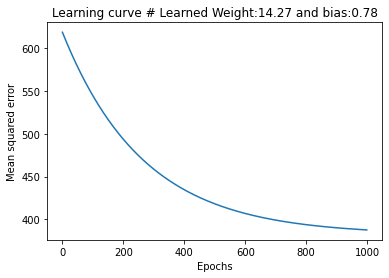

In [15]:
def plot_learning_curve(model,history):
  model_coef = model.get_model_coef()
  plt.plot(history['loss']);
  plt.title(f'Learning curve # Learned Weight:{model_coef[0] :.2f} and bias:{model_coef[1] :.2f}')
  plt.xlabel('Epochs')
  plt.ylabel('Mean squared error')
  plt.show()

plot_learning_curve(model1,history1)

In [16]:
# best parameters learned by the model
model1_coef = model1.get_model_coef()

In [17]:
def print_model_coef(model_coef):
  print(f'Actual Weight:{coef :.2f} and bias:{df["bias"][0]}')
  print(f'Learned Weight:{model_coef[0] :.2f} and bias:{model_coef[1] :.2f}')

print_model_coef(model1_coef)

Actual Weight:16.75 and bias:1.0
Learned Weight:14.27 and bias:0.78


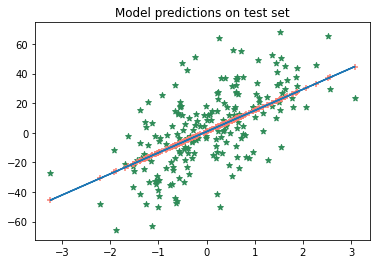

In [18]:
def plot_model_predictions(model, X_test=X_test, y_test=y_test):
  model_predictions = model.predict(X_test)

  plt.scatter(X_test, y_test, marker='*', color='seagreen')
  plt.scatter(X_test,model_predictions, marker='+', color='salmon')
  plt.plot(X_test,model_predictions)
  plt.title('Model predictions on test set')
  plt.show()
  

plot_model_predictions(model1)

## Improve model predictions 

**Standardize the data**<br>
Its a good practice to normalize the features that have different scales and range.<br>
This is important because the features are multiplied by model weights so the scale of the output and the scale of the gradient are affected by the scale of the inputs<br>
We can use Standard Scaler to scale the Features to zero mean, unit variance or we can do it ourselves just compute the mean and std of the data then for each datapoint substract off the mean and divide by std

**Hyperparameter tuning**<br>
In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.<br>
We can change the learning rate of a model to see if it improves the learning.<br>
In setting a learning rate, there is a trade-off between the rate of convergence and overshooting.

In [19]:
# standardize the data
feature_mean, feature_std = X_train.mean(), X_train.std()
label_mean, label_std = y_train.mean(), y_train.std()

scaled_X_train = (X_train-feature_mean)/feature_std
scaled_y_train = (y_train-label_mean)/label_std


scaled_X_test = (X_test-feature_mean)/feature_std
scaled_y_test = (y_test-label_mean)/label_std

print('Training data  Mean',scaled_X_train.mean(),'Standard deviation',scaled_X_train.std())
print('Testing data  Mean',scaled_X_test.mean(),'Standard deviation',scaled_X_test.std())

Training data  Mean -1.3322676295501878e-17 Standard deviation 0.9999999999999999
Testing data  Mean 0.018728526972451583 Standard deviation 1.051711590618491


In [20]:
model2 = Linear_reg()

history2 = model2.fit(scaled_X_train, scaled_y_train, epochs=700)

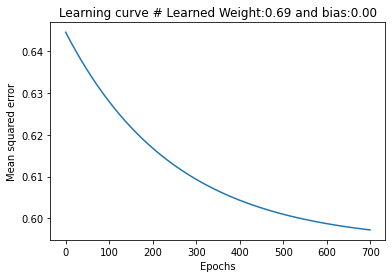

In [21]:
# Learning curve
plot_learning_curve(model2,history2)

In [22]:
# learning rate updated from 0.001 (default) to 0.01
model3 = Linear_reg(learning_rate=0.01 )
# number of epochs = 500
history3 = model2.fit(scaled_X_train, scaled_y_train, epochs=500)

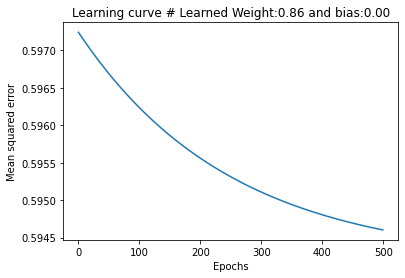

In [23]:
# learning curve
plot_learning_curve(model3, history3)